# k-Nearest Neighbour (k-NN) from Scratch

This notebook will guide you through building a k-Nearest Neighbour (k-NN) algorithm from scratch. We will use basic Python libraries to demonstrate the core concepts of this supervised machine learning algorithm.

## What is k-NN?

k-NN is a simple, yet powerful, classification algorithm. It works by finding the 'k' most similar data points (neighbours) in the training data to a new, unseen data point. The new data point is then assigned the class label that is most common among its 'k' neighbours.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for our plots
sns.set_style('whitegrid')

## 1. Creating our Dataset

First, let's create a simple dataset to work with. We will create a pandas DataFrame with two features (X1 and X2) and a target variable (Class).

In [2]:
# Create a dictionary of data
data = {
    'X1': [1, 2, 2, 3, 4, 5, 5, 6, 7, 8],
    'X2': [2, 3, 4, 4, 5, 6, 7, 8, 8, 9],
    'Class': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Display the first 5 rows of the DataFrame
df.head(10)

,X1,X2,Class
0,1,2,0
1,2,3,0
2,2,4,0
3,3,4,0
4,4,5,0
5,5,6,1
6,5,7,1
7,6,8,1
8,7,8,1
9,8,9,1


## 2. Visualising the Data

A scatter plot is a great way to visualise the relationship between our two features (X1 and X2) and see how the classes are separated.

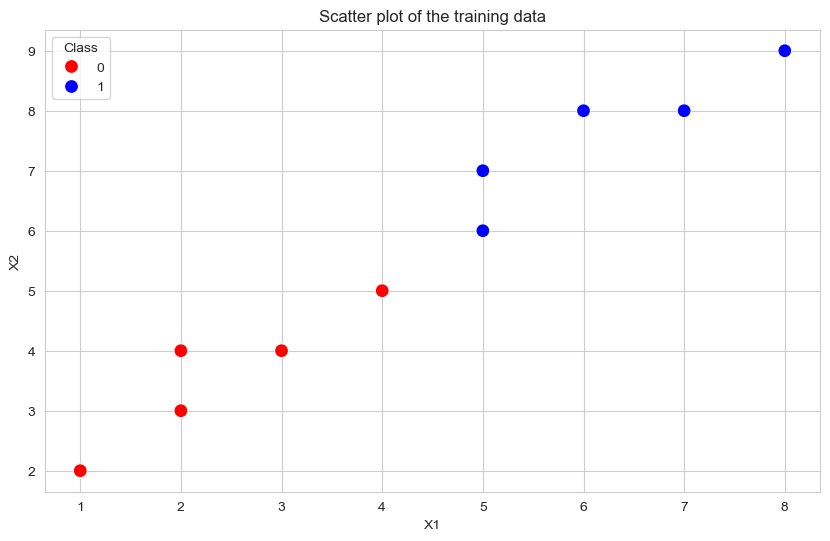

In [14]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X1', y='X2', hue='Class', data=df, s=100, palette=['#FF0000', '#0000FF'])
plt.title('Scatter plot of the training data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(title='Class', loc='upper left')
plt.show()

## 3. Building the k-NN Algorithm from Scratch

Now, let's build the k-NN algorithm. We will break it down into three main steps:

1.  **Calculate Distance:** Calculate the distance between a new data point and all other data points in the training set.
2.  **Get Neighbours:** Find the 'k' nearest neighbours.
3.  **Make Prediction:** Predict the class of the new data point based on the classes of its neighbours.

### 3.1. Calculate Euclidean Distance

We will use the Euclidean distance, which is the straight-line distance between two points. The formula for Euclidean distance between two points (p1, q1) and (p2, q2) in a 2D space is:

```
distance = sqrt((p1 - p2)^2 + (q1 - q2)^2)
```

In [5]:
def euclidean_distance(point1, point2):
    """
    Calculates the Euclidean distance between two points.
    """
    distance = 0.0
    for i in range(len(point1)-1):
        distance += (point1[i] - point2[i])**2
    return np.sqrt(distance)

### 3.2. Get Nearest Neighbours

Next, we need a function that takes the training data, a new data point, and the number of neighbours (k) as input. It will then calculate the distance to all training points and return the 'k' nearest ones.

In [8]:
def get_neighbours(training_set, test_instance, k):
    """
    Finds the k nearest neighbours in the training set for a given test instance.
    """
    distances = []
    for index, training_instance in training_set.iterrows():
        dist = euclidean_distance(test_instance, training_instance)
        distances.append((training_instance, dist))
    
    # Sort the distances in ascending order
    distances.sort(key=lambda x: x[1])
    
    # Get the top k neighbours
    neighbours = []
    for i in range(k):
        neighbours.append(distances[i][0])
    return neighbours

### 3.3. Make a Prediction

Finally, we can make a prediction. We will count the number of neighbours in each class and assign the class with the most neighbours to our new data point.

In [9]:
def predict_classification(neighbours):
    """
    Predicts the class for a new data point based on its neighbours.
    """
    class_votes = {}
    for neighbour in neighbours:
        label = neighbour[-1] # The last column is the class label
        if label in class_votes:
            class_votes[label] += 1
        else:
            class_votes[label] = 1
    print (class_votes)
            
    # Sort the class votes in descending order and return the class with the most votes
    sorted_votes = sorted(class_votes.items(), key=lambda x: x[1], reverse=True)
    return sorted_votes[0][0]

## 4. Putting It All Together

Now let's test our k-NN algorithm. We will create a new data point and see what class our algorithm predicts for it. Let's use k=3.

In [16]:
# Define a new data point
new_point = [3.5, 4.5, None]  # We set the class to None, as we want to predict it

# Set the value of k
k = 7

# Find the neighbours
neighbours = get_neighbours(df, new_point, k)

# Predict the class
prediction = predict_classification(neighbours)

print(f'The new data point is {new_point[:2]}')
print(f'The predicted class is: {prediction}')
print(f'The data point with the predicted class is: {new_point[:2]}, class {prediction}')

{0: 5, 1: 2}
The new data point is [3.5, 4.5]
The predicted class is: 0
The data point with the predicted class is: [3.5, 4.5], class 0


C:\Users\f-don\AppData\Local\Temp\ipykernel_41612\2838930900.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distance += (point1[i] - point2[i])**2


## 5. Visualising the Prediction

Let's visualise the result. We will plot the training data again, and this time we will also plot our new data point and its three nearest neighbours.

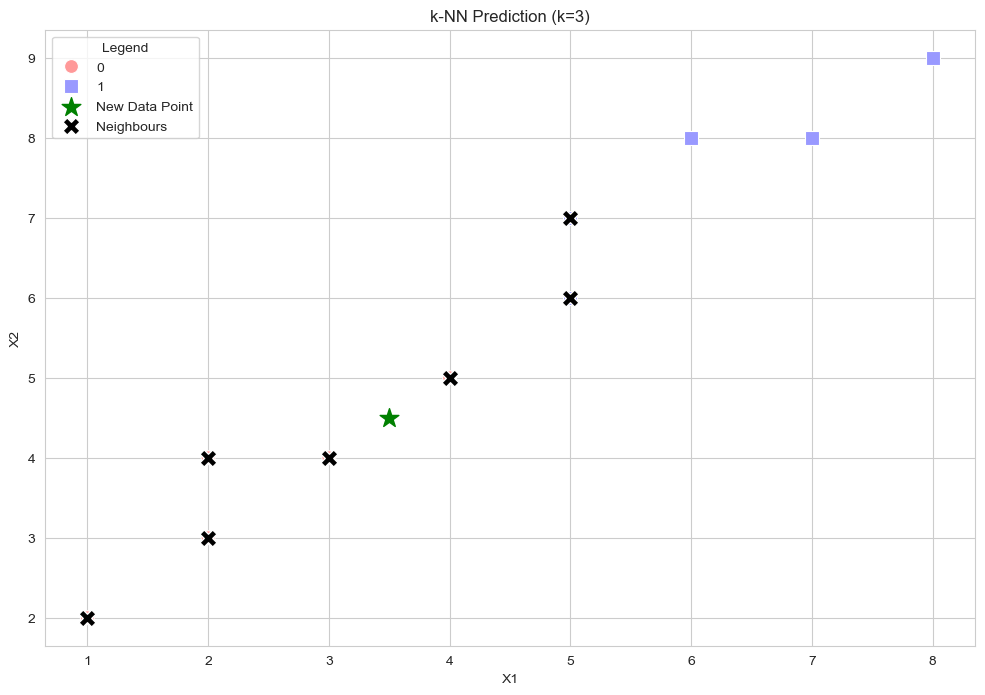

In [21]:
# Convert neighbours to a DataFrame for easier plotting
neighbours_df = pd.DataFrame(neighbours)
neighbours_df.columns = ['X1', 'X2', 'Class']

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='X1', y='X2', hue='Class', data=df, s=100, palette=['#FF9999', '#9999FF'], style='Class', markers=['o', 's'])

# Plot the new data point
plt.scatter(new_point[0], new_point[1], c='green', marker='*', s=200, label='New Data Point')

# Plot the neighbours
sns.scatterplot(x='X1', y='X2', data=neighbours_df, s=150, color='#000000', marker='X', label='Neighbours')

plt.title('k-NN Prediction (k=3)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(title='Legend', loc='upper left')
plt.show()

## 6. Conclusion

Congratulations! You have successfully built a k-Nearest Neighbours algorithm from scratch. You have learned how to:

*   Create and visualise a dataset.
*   Calculate the Euclidean distance between data points.
*   Find the nearest neighbours to a new data point.
*   Predict the class of a new data point based on its neighbours.
*   Visualise the prediction.

This exercise should give you a solid understanding of how the k-NN algorithm works under the hood.

In practice, you will not need to implement a classifier like this yourself. You can just [use a library like scikit-learn](https://www.w3schools.com/python/python_ml_knn.asp) to do it!